### 순차 데이터와 순환 신경망

#### 순차 데이터(텍스트, 시계열 데이터)

- 피드포워드 신경망(FFNN) : 입력 데이터의 흐름이 앞으로만 전달되는 신경망(완전 연결 신경망, 합성곱 신경망)
- 순환 신경망 : 다음 샘플을 위해 이전 데이터가 신경망 층에 순환

순환 신경망 : 일반적인 피드포워드 신경망 + 이전 데이터의 처리 흐름을 순환하는 고리  추가
<table>
    <tr><th><strong>순환 신경망</strong></th><th><strong>타임 스텝으로 펼친 신경망</strong></th></tr>
    <tr>
        <td>
            <img src="../image/순환 신경망.png"/>
        </td>
        <td>
            <img src="../image/순환 신경망 과정.png"/>
        </td>
    </tr>
    <tr>
        <td>
            <div>A,B,C 3개의 샘플을 처리하는 순환 신경망의 뉴런이 있다고 가정<br/>
1. A를 처리하고 난 출력 $O_A$이 다시 뉴런으로 들어감(A에 대한 정보가 있음)<br/>
2. B를 처리할 때 앞에서 사용해 만든 출력 $O_A$를 함께 사용 -> $O_B$에는 A에 대한 정보가 어느 정도 포함<br/>
3. C를 처리할 때 앞에서 만든 $O_B$를 함께 사용 => $O_C$에는 A, B에 대한 정보가 있음(B에 대한 정보가 더 많음)</div>
        </td>
        <td>
        <div>순환 신경망에서는 <br/>
- 타임스텝 : 샘플을 처리하는 한 단계<br/>
- 셀 : 층(여러 개의 뉴런이 있지만 뉴런을 모두 표시하지 않고 하나의 셀로 층을 표현)<br/>
- 은닉 상태 : 셀의 출력(완젼 연결 신경망의 활성화 출력, 활성곱 신경망의 특성맵)<br/>
- 은닉층의 활성화 함수로는 하이퍼볼릭 탄젠트 많이 사용(-1 ~ 1)</div><br/><div>2개의 가중치<br/>
- x에 대한 가중치<br/>
- y에 대한 가중치<br/>

초기 은닉상태 $h_0$은 0</div>
        </td>
    </tr>
</table>

<strong> 순환 신경망의 가중치</strong>
<table>
    <tr>
        <td>
            <img src='../image/순환 신경망 가중치.png'/>
        </td>
        <td>
        <table>
            <tr>
                <td>x의 가중치 4개, r의 가중치 3개</td>
                <td>=> 4 * 3 = 12개의 가중치</td>
            </tr>
            <tr>
                <td>은닉 상태의 가중치 3개</td>
                <td>=> 3 * 3 = 9개의 가중치</td>
            </tr>
            <tr>
                <td>각 뉴련마다 하나의 절편</td>
                <td>=> 3개의 가중치</td>
            </tr>
            <tr>
                <td>모델 파라미터 수</td>
                <td>12 + 9 + 3 = 24</td>
            </tr>
        </table>
    </tr>
</table>




<strong>순환 신경망의 입력(3차원 텐서)</strong><br/>
<table><tr><td><img src='../image/순환 신경망 입력.png'/>
</td><td><p>1 : 하나의 문장</p><p>4 : 4개의 단어(토큰)</p><p>3 : 하나의 단어(토큰)마다 3개의 벡터로 구성</p><hr/><div>샘플이 순환 층을 통과하면 2차원으로 바뀜(샘플, 뉴런 개수)</div></td></tr></table>


<strong>다층 순환 신경망</strong>
<table><tr><td><img src='../image/다층 순환 신경망.png'/>
</td><td><p>출력은 마지막 타임 스텝의 은닉 상태만 출력</p><hr/><p>순환 신경망을 2개 연결했을 때 첫 순환 신경망은 모든 타임스텝의 은닉 상태를 출력해서 넘겨줌</p><p>마지막 순환 신경망은 마지막 타임 스텝의 은닉 상태만 출력</p></td></tr></table>


<strong>순환 신경망을 사용한 예측 예시</strong>
<div><img src='../image/순환 신경망 예측 예시.png'/></div>

### 순환 신경망으로 IMDBN 리뷰 분류하기

#### IMDB 리뷰 데이터셋
- 고유한 토큰을 정수로 변환
- 고유한 토큰의 집합 : 어휘 사전

In [23]:
from tensorflow.keras.datasets import imdb

(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500) # 500개의 단어만 사용용

print(train_input.shape, test_input.shape)

(25000,) (25000,)


In [24]:
print(len(train_input[0]), train_input[0])
print(len(train_input[1]), train_input[1])
# 리뷰의 길이가 다름

218 [1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]
189 [1, 194, 2, 194, 2, 78, 228, 5, 6, 2, 2, 2, 134, 26, 4, 2, 8, 118, 2, 14, 394, 20, 13, 119, 2, 189, 102, 5, 207, 110, 2, 21, 14, 69, 188, 8, 30

In [25]:
print(train_target[:20]) # 0 : 부정, 1 : 긍정정

[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]


In [26]:
from sklearn.model_selection import train_test_split

train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)

239.00925 178.0


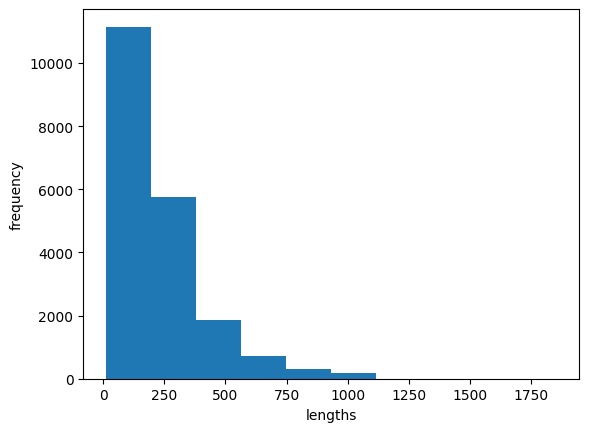

In [27]:
# 리뷰 길이 시각화
import numpy as np
import matplotlib.pyplot as plt

lengths = np.array([len(x) for x in train_input])
print(np.mean(lengths), np.median(lengths))

plt.hist(lengths)
plt.xlabel('lengths')
plt.ylabel('frequency')
plt.show()

In [28]:
# 대부분 리뷰 길이는 300미만, 리뷰는 대부분 짧아서 중간값보다 훨씬 짧은 100개의 단어만 사용
## 100개의 단어보다 작은 리뷰는 길이를 100에 맞추기 위해 패딩이 필요(패딩을 나타내는 토큰 0으로 채움) : pad_sequences() 함수
## pad_sequences : maxlen을 넘을 경우 문장 앞부분을 자름(뒷부분을 자르고 싶으면 truncating 매개변수의 값을 'post'로 하면 됨)

from tensorflow.keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_input, maxlen=100)
print(train_seq.shape)
print(train_seq[0])

(20000, 100)
[ 10   4  20   9   2 364 352   5  45   6   2   2  33 269   8   2 142   2
   5   2  17  73  17 204   5   2  19  55   2   2  92  66 104  14  20  93
  76   2 151  33   4  58  12 188   2 151  12 215  69 224 142  73 237   6
   2   7   2   2 188   2 103  14  31  10  10 451   7   2   5   2  80  91
   2  30   2  34  14  20 151  50  26 131  49   2  84  46  50  37  80  79
   6   2  46   7  14  20  10  10 470 158]


In [29]:
print(train_input[0][-10:]) # 샘플의 앞부분이 짤림

[6, 2, 46, 7, 14, 20, 10, 10, 470, 158]


In [30]:
val_seq = pad_sequences(val_input, maxlen=100)

#### 순환 신경망 만들기

In [31]:
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.SimpleRNN(8, input_shape=(100,500)))
# 첫번째 매개변수 : 사용할 뉴런의 개수
# input_shape(100,200)
## 100 : 앞에서 정한 샘플의 길이(maxlen = 100)
## 500 : 토큰을 정수로 변환할 때 이 정수 사이에는 어떤 관련이 X -> 원-핫 인코딩 사용
## imdb.load_data에서 500개의 단어만 사용하도록 지정 -> 원-핫 인코딩으로 표현하려면 배열의 길이가 500이어야 함


model.add(keras.layers.Dense(1, activation='sigmoid'))

c:\Users\cho03\Desktop\공부\MLDL\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [32]:
# 원-핫 인코딩
train_oh = keras.utils.to_categorical(train_seq)

print(train_seq.shape)
print(train_oh.shape) # 정수 하나마다 500차원의 배열로 밴경

(20000, 100)
(20000, 100, 500)


In [33]:
print(train_oh[0][0][:12])
print(np.sum(train_oh[0][0]))

val_oh = keras.utils.to_categorical(val_seq)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
1.0


In [34]:
model.summary()
# 500(500의 원핫 인코딩 -> 500개의 입력) * 8개의 뉴런 + 8의 뉴런 * 8(순환 가중치) + 8(절편)
# 8개의 출력 * 1의 가중치 + 1의 절편

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_3 (SimpleRNN)        │ (None, 8)              │         4,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,081 (15.94 KB)

 Trainable params: 4,081 (15.94 KB)

 Non-trainable params: 0 (0.00 B)

#### 순환 신경망 훈련하기

In [35]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)

model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplelernn-model.keras', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3)

history = model.fit(train_oh, train_target, epochs=100, batch_size=64, validation_data=(val_oh, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.4967 - loss: 0.6992 - val_accuracy: 0.4944 - val_loss: 0.6969
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.5010 - loss: 0.6961 - val_accuracy: 0.5014 - val_loss: 0.6955
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.5121 - loss: 0.6940 - val_accuracy: 0.5038 - val_loss: 0.6944
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.5205 - loss: 0.6921 - val_accuracy: 0.5130 - val_loss: 0.6933
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.5274 - loss: 0.6906 - val_accuracy: 0.5172 - val_loss: 0.6923
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.5358 - loss: 0.6894 - val_accuracy: 0.5210 - val_loss: 0.6912
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.5542 - loss: 0.6862 - val_accuracy: 0.5282 - val_loss: 0.6900
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.5589 - loss: 0.6845 - 

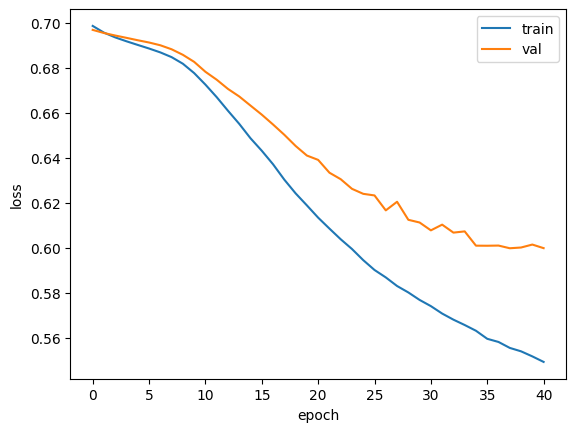

In [36]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [37]:
print(train_seq.nbytes, train_oh.nbytes)
# 원-핫 인코딩 사용시 데이터가 엄청 커짐 -> 좋지 않음음

8000000 8000000000


#### 단어 임베딩을 사용하기
- 단어 임베딩 : 각 단어를 고정된 크기의 실수 벡터로 변환

In [38]:
model2 = keras.Sequential()

model2.add(keras.layers.Embedding(500, 16, input_shape=(100,))) 
# 500 : 어휘 사전 크기(imdb.load_data(num_words=500))
# 16 : 출력 차원(토큰 하나를 16개의 벡터로 표현 : 원-핫 인코딩보다 훨씬 작은 크기 사용)
# input_shape : 입력 시퀀스 길이(샘플의 길이가 100)
model2.add(keras.layers.SimpleRNN(8))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

In [39]:
model2.summary()
# 500(입력) * 16(16개의 벡터) = 8000
# 16개의 출력 * 8개의 뉴런 + 8개의 뉴런 * 8개의 순환 가중치 + 8개의 절편
# 8개의 출력 + 1개의 절편

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (None, 100, 16)        │         8,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_4 (SimpleRNN)        │ (None, 8)              │           200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,209 (32.07 KB)

 Trainable params: 8,209 (32.07 KB)

 Non-trainable params: 0 (0.00 B)

In [40]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)

model2.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-embedding-model.keras', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

history = model2.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.5054 - loss: 0.6954 - val_accuracy: 0.5732 - val_loss: 0.6811
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6168 - loss: 0.6688 - val_accuracy: 0.6600 - val_loss: 0.6496
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6866 - loss: 0.6365 - val_accuracy: 0.7046 - val_loss: 0.6195
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7178 - loss: 0.6106 - val_accuracy: 0.7030 - val_loss: 0.6079
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7431 - loss: 0.5871 - val_accuracy: 0.7302 - val_loss: 0.5860
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7500 - loss: 0.5714 - val_accuracy: 0.7490 - val_loss: 0.5664
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7626 - loss: 0.5559 - val_accuracy: 0.7500 - val_loss: 0.5589
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7742 - loss: 0.5370 - val_accuracy: 0.7592

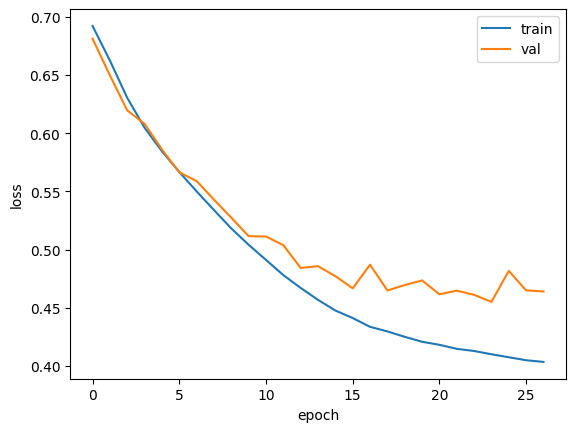

In [41]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

### LSTM과 GRU 셀

#### LSTM(Long Short-Term Memory)

##### LSTM 구조 : 단기 기억을 오래 기억하기 위해 고안

- 은닉 상태 : 입력과 이전 타임 스텝의 은닉 상태를 가중치에 곱한 후 활성화 함수를 통과시켜 다음 은닉 상태를 만듦, 시그모이드 활성화 함수 사용
- 셀 상태 : 은닉 상태와 다음 층으로 전달되지 않고 LSTM 셀에서 순환만 되는 값(초록색)<br/><br/>
![](../image/LSTM.png)
1. 입력을 통과해 $h_f$를 만듦
2. 입력과 은닉 상태를 또 다른 가중치 $w_f$에 곱한 다음 시그모이드 함수를 통과 -> 이전 타임스텝의 셀 상태와 곱해 새로운 셀 상태를 만듦<br/>이 셀 상태가 오른쪽에서 tanh 함수를 통과해 새로운 은닉 상태를 만드는 데 기여
3. 2개의 작은 셀이 더 추가($w_i, w_j$) : 입력과 은닉 상태를 각기 다른 가중치에 곱한 다음, 하나는 시그모이드, 다른 하나는 tanh를 통과 후 곱함<br/>
곱한 값을 이전 셀 상태와 더한게 최종적인 다음 셀 상태

##### LSTM 신경망 훈련하기

In [42]:
from tensorflow.keras.datasets import imdb

(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500) # 500개의 단어만 사용용

from sklearn.model_selection import train_test_split

train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_input, maxlen=100)

In [43]:
model = keras.Sequential()

model.add(keras.layers.Embedding(500, 16, input_shape=(100,))) 
model.add(keras.layers.LSTM(8))
# SimpleRnn의 모델 파라미터 개수는 200개, LSTM에는 작은 셀이 4개 => 4배인 800개
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.summary()

c:\Users\cho03\Desktop\공부\MLDL\.venv\Lib\site-packages\keras\src\layers\core\embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ (None, 100, 16)        │         8,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 8)              │           800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,809 (34.41 KB)

 Trainable params: 8,809 (34.41 KB)

 Non-trainable params: 0 (0.00 B)

In [45]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)

model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.keras', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

history = model.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5251 - loss: 0.6927 - val_accuracy: 0.5568 - val_loss: 0.6918
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.5785 - loss: 0.6908 - val_accuracy: 0.6008 - val_loss: 0.6889
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6171 - loss: 0.6870 - val_accuracy: 0.6320 - val_loss: 0.6826
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6516 - loss: 0.6784 - val_accuracy: 0.6852 - val_loss: 0.6599
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7027 - loss: 0.6403 - val_accuracy: 0.7082 - val_loss: 0.6005
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7225 - loss: 0.5910 - val_accuracy: 0.7254 - val_loss: 0.5793
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7388 - loss: 0.5687 - val_accuracy: 0.7444 - val_loss: 0.5584
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7523 - loss: 0.5488 - val_accu

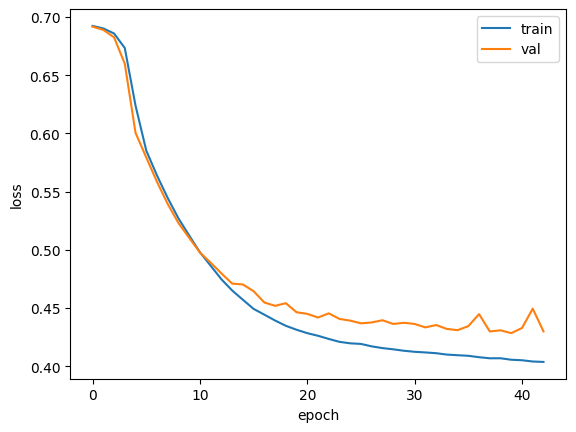

In [46]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

##### 순환층에 드롭아웃 적용하기

In [48]:
model2 = keras.Sequential()

model2.add(keras.layers.Embedding(500, 16, input_shape=(100,))) 
model2.add(keras.layers.LSTM(8, dropout=0.3))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

In [49]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)

model2.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-dropout-model.keras', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

history = model2.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.5125 - loss: 0.6931 - val_accuracy: 0.5462 - val_loss: 0.6924
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5566 - loss: 0.6919 - val_accuracy: 0.5784 - val_loss: 0.6908
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5854 - loss: 0.6898 - val_accuracy: 0.6158 - val_loss: 0.6872
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6190 - loss: 0.6847 - val_accuracy: 0.6716 - val_loss: 0.6750
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6682 - loss: 0.6634 - val_accuracy: 0.7000 - val_loss: 0.6230
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6977 - loss: 0.6162 - val_accuracy: 0.7072 - val_loss: 0.6001
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7136 - loss: 0.5899 - val_accuracy: 0.7284 - val_loss: 0.5739
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7347 - loss: 0.5663 - val_accu

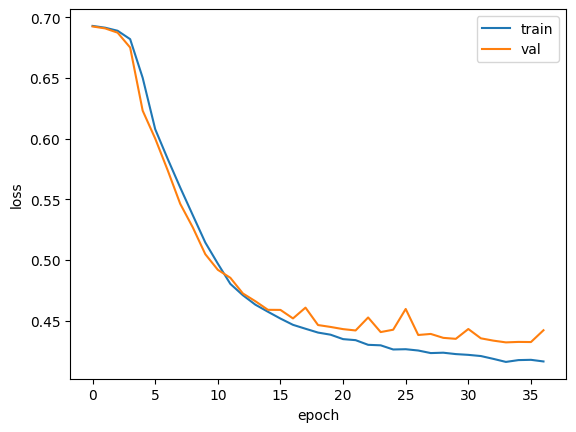

In [50]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

##### 2개의 층을 연결하기
순환층을 연결할 때 모든 순환 층에 순차 데이터가 필요<br/>
-> 앞쪽의 순환층이 모든 타임스텝에 대한 은닉 상태를 출력해야 함, 오직 마지막 순환층만 마지막 타임스텝의 은닉 상태를 출력해야 함
![](../image/다층%20순환%20신경망.png)

In [ ]:
model3 = keras.Sequential()

model3.add(keras.layers.Embedding(500, 16, input_shape=(100,))) 
model3.add(keras.layers.LSTM(8, dropout=0.3, return_sequences=True)) # 모든 타임스텝의 은닉 상태 출력
# 모든 타임스텝(100개)의 의늑 상태를 출력하기 때문에 (None, 100, 8)
model3.add(keras.layers.LSTM(8, dropout=0.3))
model3.add(keras.layers.Dense(1, activation='sigmoid'))

model3.summary()

c:\Users\cho03\Desktop\공부\MLDL\.venv\Lib\site-packages\keras\src\layers\core\embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_7 (Embedding)         │ (None, 100, 16)        │         8,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 100, 8)         │           800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 8)              │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,353 (36.54 KB)

 Trainable params: 9,353 (36.54 KB)

 Non-trainable params: 0 (0.00 B)

In [53]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)

model3.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-2lstm-dropout-model.keras', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

history = model3.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.5083 - loss: 0.6930 - val_accuracy: 0.5258 - val_loss: 0.6926
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.5466 - loss: 0.6923 - val_accuracy: 0.5694 - val_loss: 0.6910
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.5882 - loss: 0.6898 - val_accuracy: 0.6402 - val_loss: 0.6834
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.6217 - loss: 0.6793 - val_accuracy: 0.6852 - val_loss: 0.6479
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.6847 - loss: 0.6331 - val_accuracy: 0.7104 - val_loss: 0.5749
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.7218 - loss: 0.5644 - val_accuracy: 0.7316 - val_loss: 0.5390
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.7387 - loss: 0.5395 - val_accuracy: 0.7472 - val_loss: 0.5184
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.7551 - loss: 0.5188 - 

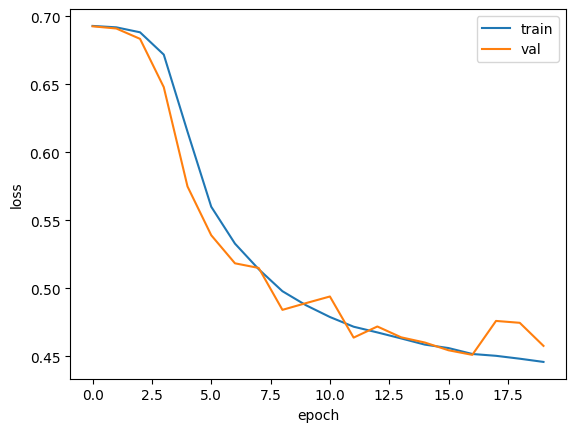

In [54]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

#### GRU(Gated Recurrent Unit, LSTM의 간소화 버전)

##### GRU 구조

- 셀 상태가 없음, 은닉 상태만 사용
![](../image/GRU.png)(왼쪽이 논문에서 나오는 내용, 오른쪽은 텐서플로우에서 구현한 GRU) => (서로 다름)
1. 은닉 상태와 입력을 곱해서 새로운 입력 상태를 만듦
2. 작은 셀이 3개<br/>
    - 2개 : 시그모이드 사용
    - 1개 : tanh 사용
3. $w_z$를 사용하는 셀의 출력이 은닉 상태에 바로 곱해져 삭제 게이트 역할
    - 이와 똑같은 출력을 1에서 뺀 다음에 가장 오른쪽 $w_g$를 사용하는 셀의 출력에 곱합(입력되는 정보를 제어하는 역할)
    - 가운데 $w_r$을 사용하는 셀에서 출력된 값은 $w_g$셀이 사용할 은닉 상태의 정보를 제어

##### GRU 신경망 훈련하기

In [60]:
model4 = keras.Sequential()

model4.add(keras.layers.Embedding(500, 16, input_shape=(100,)))
model4.add(keras.layers.GRU(8))
# 텐서플로우에서 사용한 GRU => (16 * 8 + 8 * 8 + 8)*3개의 셀 + 24(w_z, w_h, w_r에서 3개의 절편 * 8개의 뉴런)

model4.add(keras.layers.Dense(1, activation='sigmoid'))

model4.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_10 (Embedding)        │ (None, 100, 16)        │         8,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_2 (GRU)                     │ (None, 8)              │           624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,633 (33.72 KB)

 Trainable params: 8,633 (33.72 KB)

 Non-trainable params: 0 (0.00 B)

In [57]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)

model4.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.keras', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

history = model4.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100


313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.5154 - loss: 0.6928 - val_accuracy: 0.5434 - val_loss: 0.6919
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5441 - loss: 0.6917 - val_accuracy: 0.5404 - val_loss: 0.6908
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.5588 - loss: 0.6903 - val_accuracy: 0.5624 - val_loss: 0.6888
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.5810 - loss: 0.6877 - val_accuracy: 0.5704 - val_loss: 0.6859
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.5834 - loss: 0.6845 - val_accuracy: 0.5814 - val_loss: 0.6817
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.5987 - loss: 0.6787 - val_accuracy: 0.6030 - val_loss: 0.6745
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.6113 - loss: 0.6709 - val_accuracy: 0.6190 - val_loss: 0.6635
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6361 - loss: 0.6564 - val_accuracy

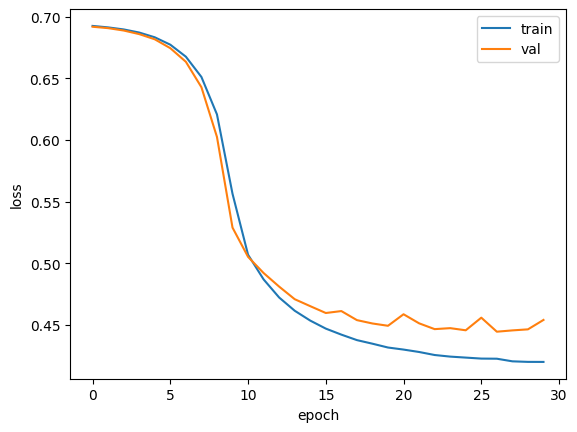

In [58]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

#### LSTM과 GRU 셀로 훈련

In [59]:
test_seq = pad_sequences(test_input, maxlen=100)
rnn_model = keras.models.load_model('best-2lstm-dropout-model.keras')
rnn_model.evaluate(test_seq, test_target)

782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7929 - loss: 0.4484


[0.4496828615665436, 0.7903599739074707]